In [2]:
#The aim of this project is to investigate the relationships between different criteria and create meaningful insights communicated through  visualizations and statistical summaries.


In [4]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv(r"C:\Users\bee\Desktop\Data set\happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
df.shape

(158, 12)

In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [9]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [10]:
#Checking Duplicate value in dataframe
print("Total Duplicate Rows are",df.duplicated().sum())

Total Duplicate Rows are 0


In [11]:
#checking for null values(there are no null values)
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<Axes: >

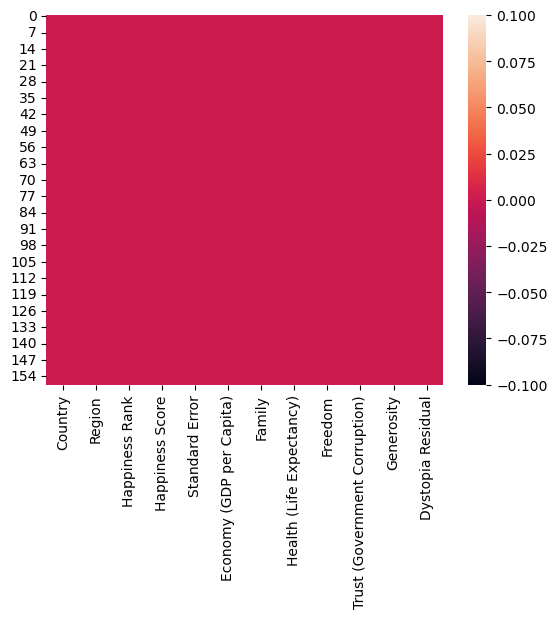

In [13]:
#checking null values using the heatmap(there no null values in the data set)
sns.heatmap(df.isnull())

In [14]:
#checking number of unique values
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [15]:
#checking the list of counts of target column.
df["Happiness Score"].nunique()

157

In [16]:
#checking unique values in target column.
df["Happiness Score"].value_counts()


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

In [17]:
#Statistical summary of numerical columns
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [18]:
#Dropping irrelevant columns which are simply labels
df.drop(columns= ['Country','Region'], axis = 1, inplace = True)


In [19]:
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


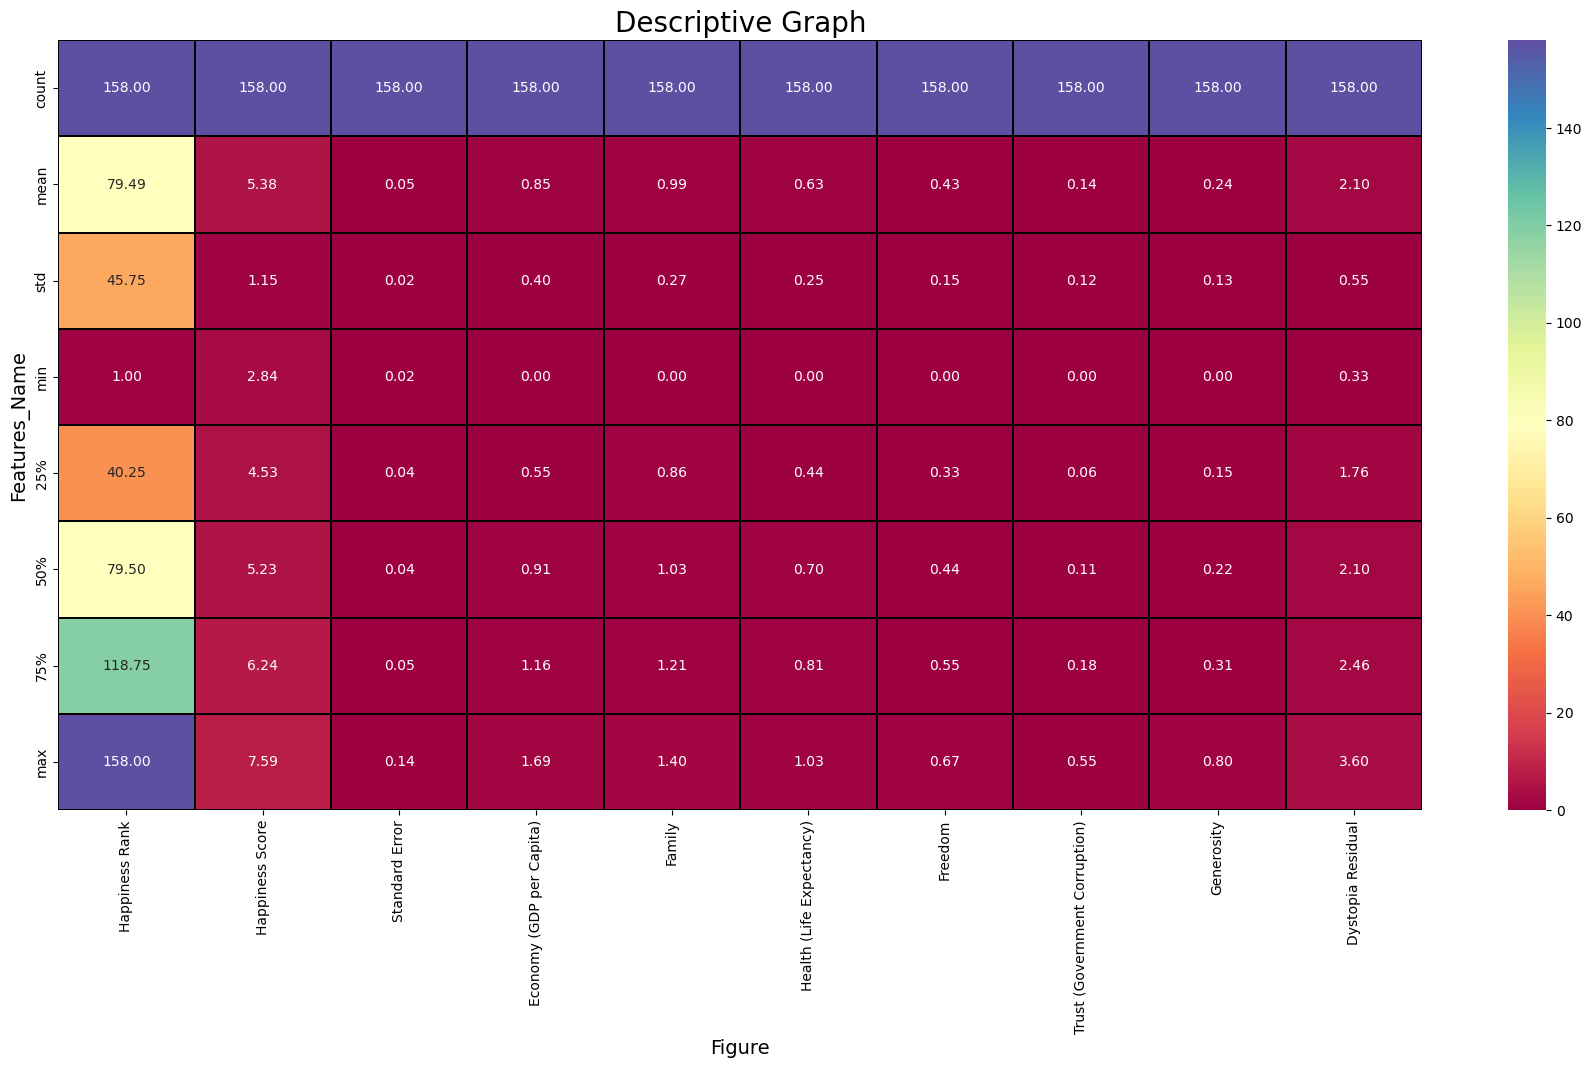

In [21]:
#Graphical view of statistical data description
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

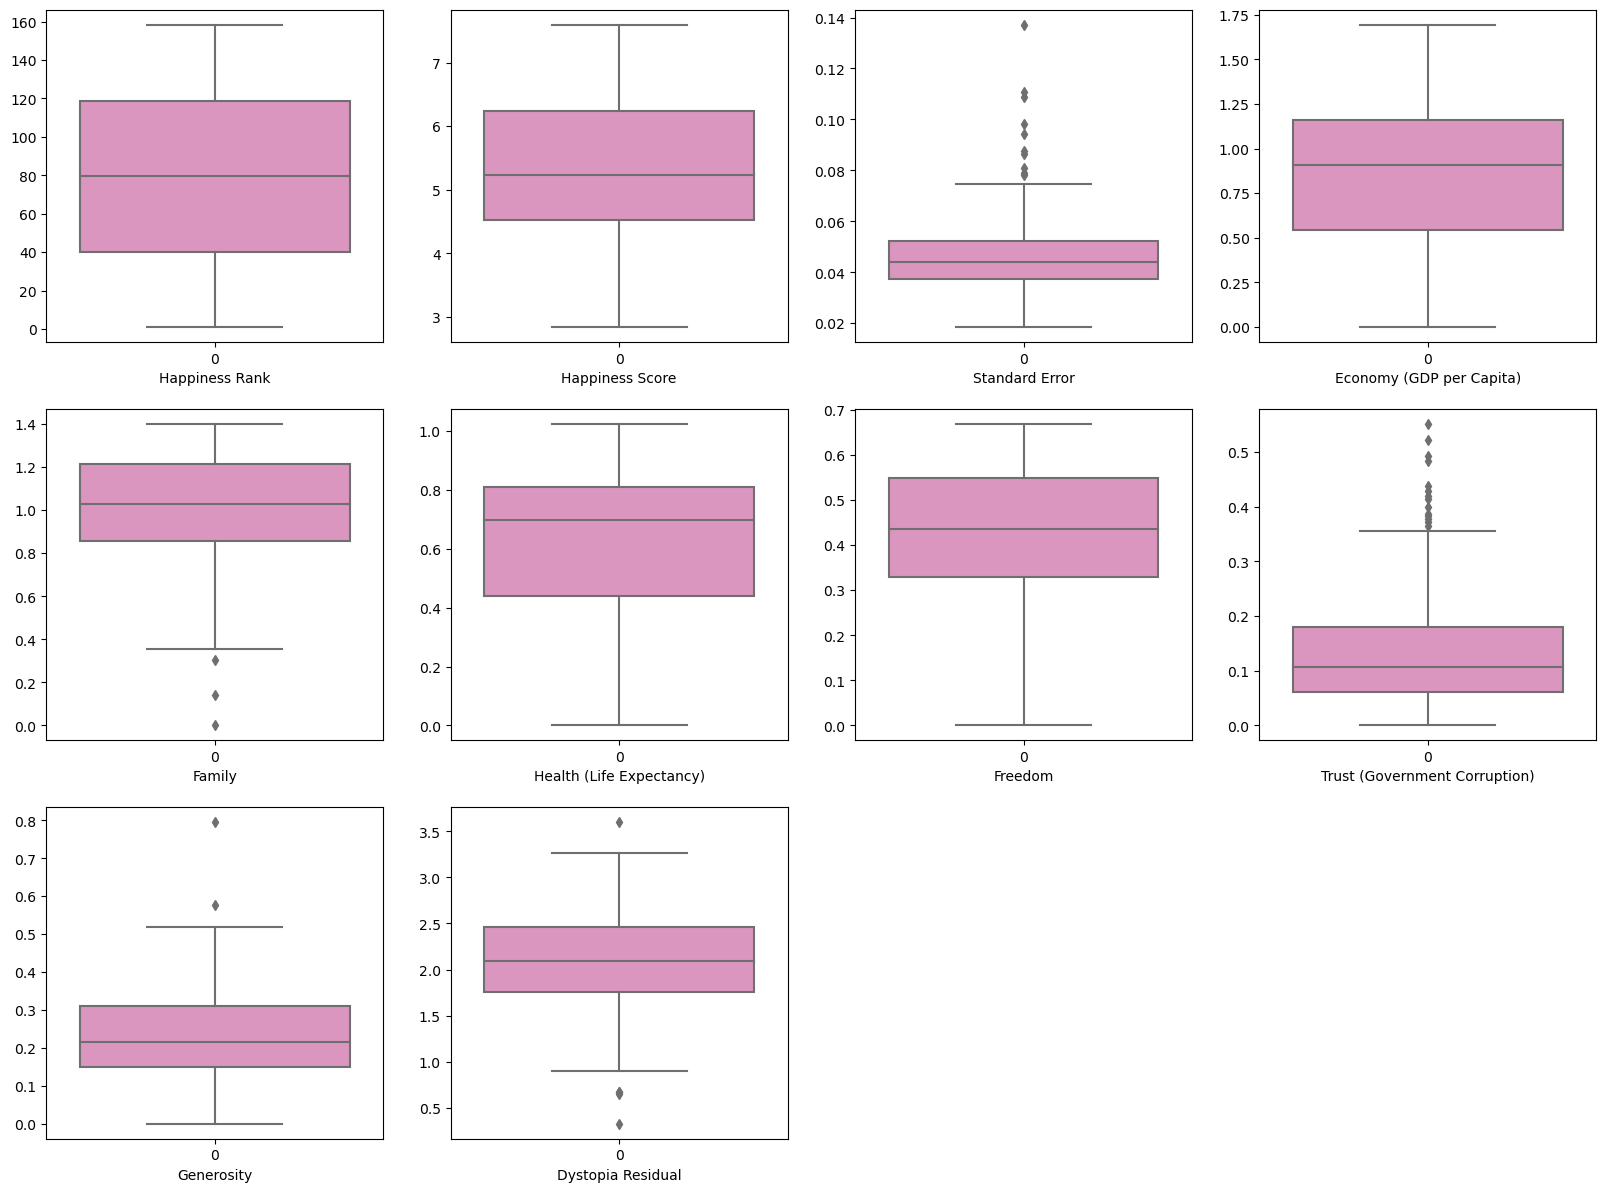

In [22]:
#Checking outliers using boxplot-the distance between the 1st,2nd and 3rd quartile in  some columns like Health,Trust and so on are significant.there are outliers
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette ="Set2_r")
        plt.xlabel(i)
        
    p+=1
    
plt.show()#by looking at the boxplot,in certain columns like Trust,Dystopia,Standard error and Generosity,values above the maximum are outliers.

In [26]:
#Remove outliers using zscore method and Inter quartile range method then compare the two
from scipy.stats import zscore
out_features=df[['Generosity','Family','Happiness Rank','Standard Error','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Dystopia Residual']]
z=np.abs(zscore(out_features))
z

,Generosity,Family,Happiness Rank,Standard Error,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,0.471040,1.320281,1.721000,0.805926,1.369621,1.263408,1.577438,2.309652,0.758258
1,1.575856,1.514458,1.699075,0.055889,1.135226,1.289434,1.332456,0.016480,1.092857
2,0.824293,1.361054,1.677149,0.854487,1.192861,0.992229,1.469659,2.842774,0.712335
3,0.868638,1.251922,1.655224,0.531526,1.525130,1.035145,1.605131,1.852081,0.663893
4,1.748563,1.221204,1.633299,0.722845,1.194876,1.118054,1.360416,1.555725,0.639337
...,...,...,...,...,...,...,...,...,...
153,0.087228,0.800520,1.633576,0.774917,1.552987,0.818610,1.087740,3.413922,2.588925
154,0.433117,2.346860,1.655501,0.662582,1.392303,1.263362,0.372033,0.529210,0.843967
155,1.856891,1.901086,1.677427,0.132534,0.455245,0.372199,1.809238,0.381419,3.208430
156,0.316950,2.118467,1.699352,2.263962,2.067566,1.649648,2.064472,0.357715,0.481985


In [27]:
#threshold
np.where (z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([7, 3, 3, 3, 0, 1, 7, 8, 1], dtype=int64))

In [28]:
z.iloc[115,3]

3.673991869431451

In [29]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(149, 10)

In [30]:
#shape of old and new dataframe
print("Old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Old Data Frame- 158
New Data Frame- 149


In [31]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage- 5.69620253164557


In [32]:
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [35]:
df=df1

In [37]:
#Removing outliers using the interquartile range method
#1st quartile
Q1=out_features.quantile(0.25) 

#3rd quartile
Q3=out_features.quantile(0.75)

#IQR
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2.shape


(126, 10)

In [39]:
print("Data Loss Percentage-",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage- 15.436241610738255


In [ ]:
#We will choose the z score method because it is resulting in less data loss

In [40]:
df=df1

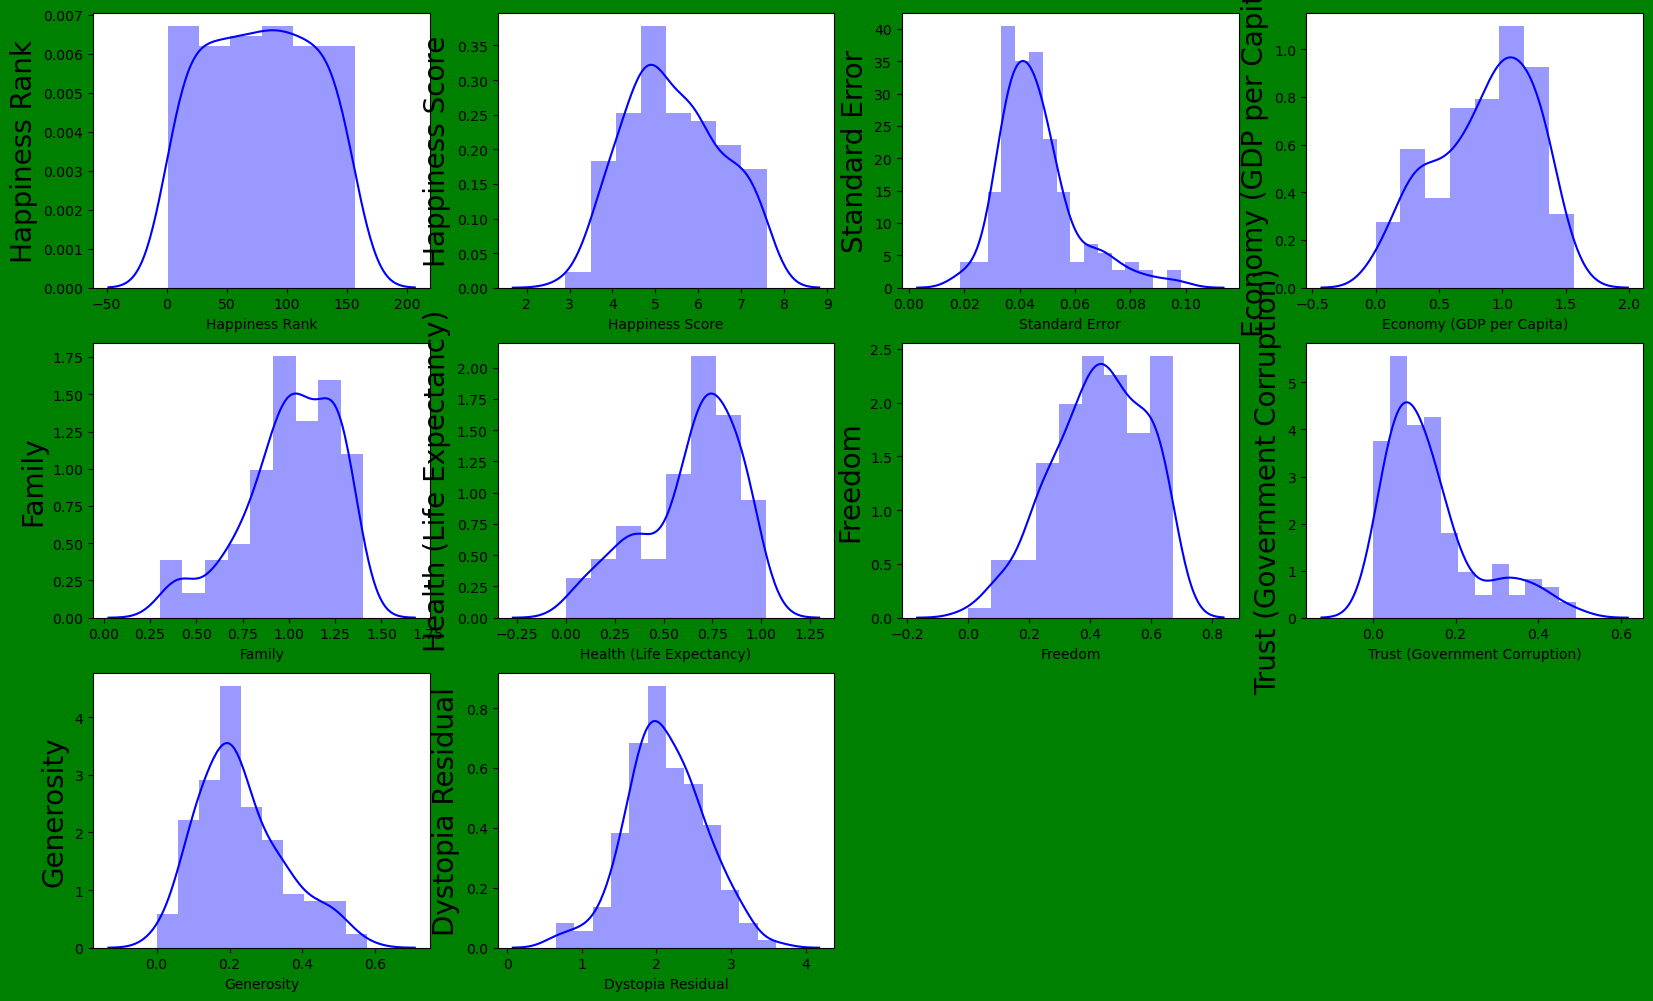

In [43]:
#checking distribution of data
plt.figure(figsize=(20,25), facecolor='green')
plotnumber = 1

for column in df:
    if plotnumber<=18:     
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
#From the distribution plots above we can see that the data almost looks normal except in Trust and Standard error columns where it is a bit skewed.

In [44]:
#Checking for Skewness
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [47]:
#Remove skewness using cuberoot method
df['Standard Error']=np.cbrt(df['Standard Error'])

In [48]:
#Checking for Skewness again-the skeweness has been reduced in both Standard Error and Trust columns
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

<Axes: xlabel='Trust (Government Corruption)', ylabel='Density'>

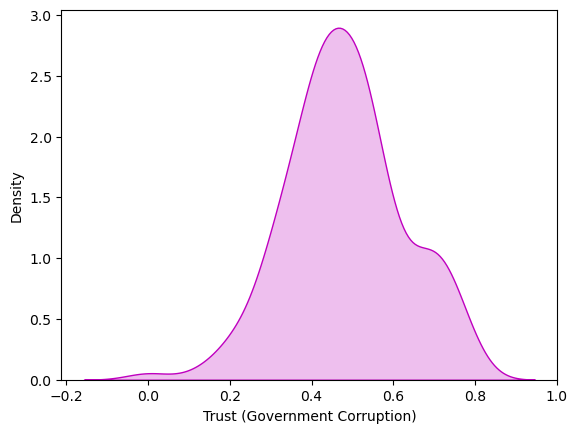

In [49]:
#Visualize how the data has been distributed in Trust (Government Corruption) after removing skeweness
sns.distplot(df['Trust (Government Corruption)'],color="m",kde_kws={"shade":True},hist=False)

<Axes: xlabel='Standard Error', ylabel='Density'>

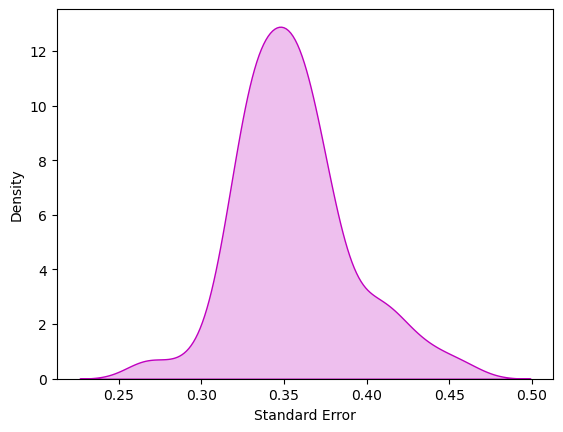

In [51]:
#Visualize how the data has been distributed in Standard Error after removing skeweness
sns.distplot(df['Standard Error'],color="m",kde_kws={"shade":True},hist=False)

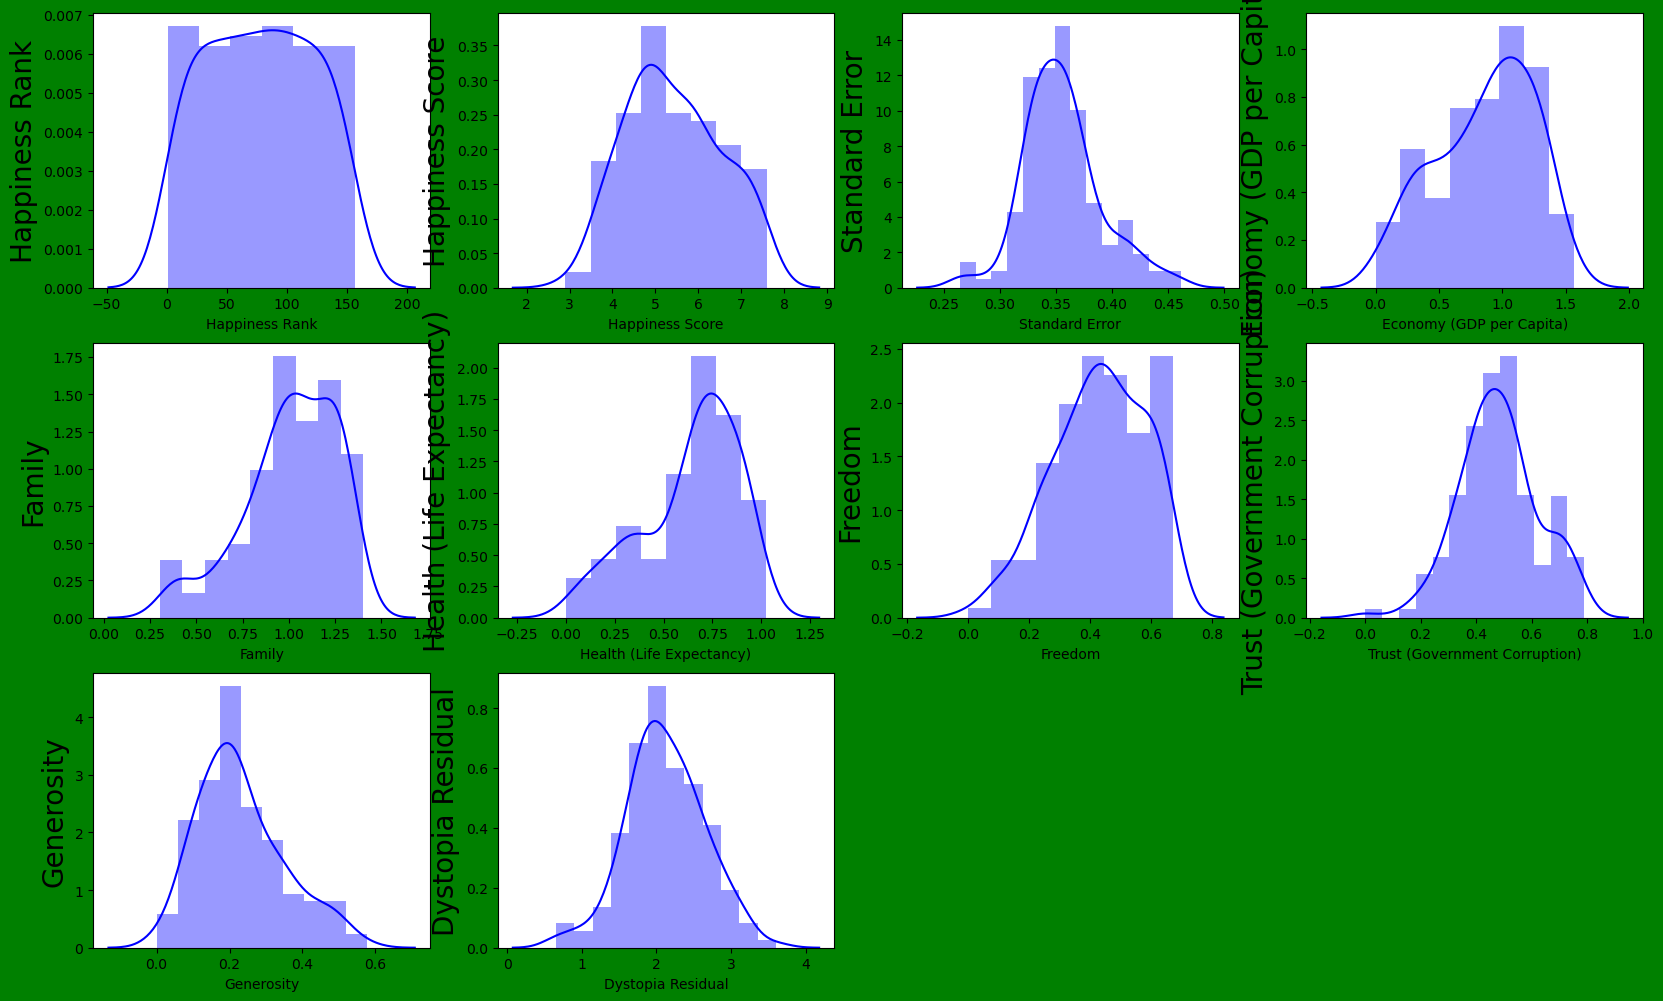

In [52]:
#checking distribution of data after removing skeweness
plt.figure(figsize=(20,25), facecolor='green')
plotnumber = 1

for column in df:
    if plotnumber<=18:     
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [53]:
#checking correlation between  features and target
cor = df.corr()
cor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992921,0.219425,-0.773651,-0.720359,-0.736758,-0.571089,-0.365700,-0.225626,-0.526680
Happiness Score,-0.992921,1.000000,-0.237228,0.773577,0.720868,0.729191,0.585066,0.394775,0.250903,0.528334
Standard Error,0.219425,-0.237228,1.000000,-0.244856,-0.129305,-0.343251,-0.202292,-0.095125,-0.155298,0.028798
Economy (GDP per Capita),-0.773651,0.773577,-0.244856,1.000000,0.628589,0.817470,0.376780,0.231317,0.020730,0.026936
Family,-0.720359,0.720868,-0.129305,0.628589,1.000000,0.503890,0.474229,0.180054,0.154011,0.118062
Health (Life Expectancy),-0.736758,0.729191,-0.343251,0.817470,0.503890,1.000000,0.382595,0.158670,0.129328,0.031212
Freedom,-0.571089,0.585066,-0.202292,0.376780,0.474229,0.382595,1.000000,0.482062,0.428718,0.058596
Trust (Government Corruption),-0.365700,0.394775,-0.095125,0.231317,0.180054,0.158670,0.482062,1.000000,0.241413,0.107929
Generosity,-0.225626,0.250903,-0.155298,0.020730,0.154011,0.129328,0.428718,0.241413,1.000000,-0.034239
Dystopia Residual,-0.526680,0.528334,0.028798,0.026936,0.118062,0.031212,0.058596,0.107929,-0.034239,1.000000


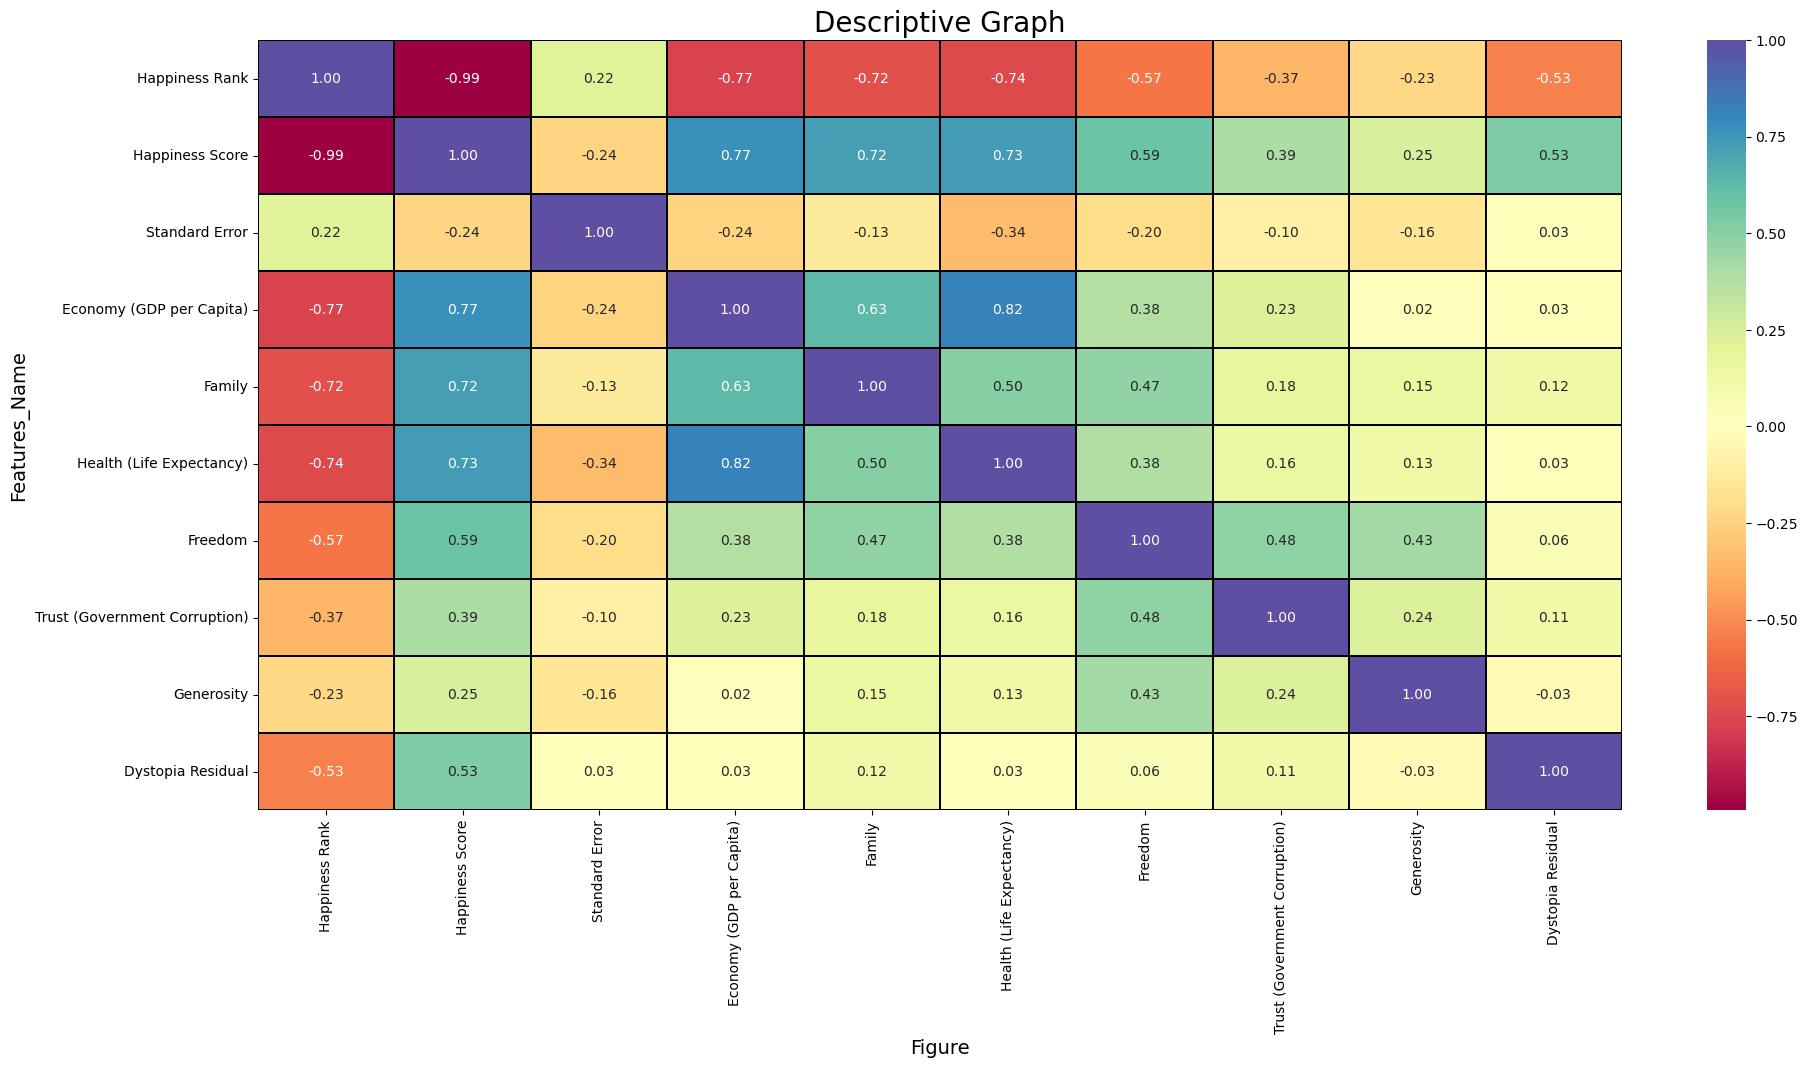

In [56]:
#Checking correlation using a graphic heatmap
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

<Axes: >

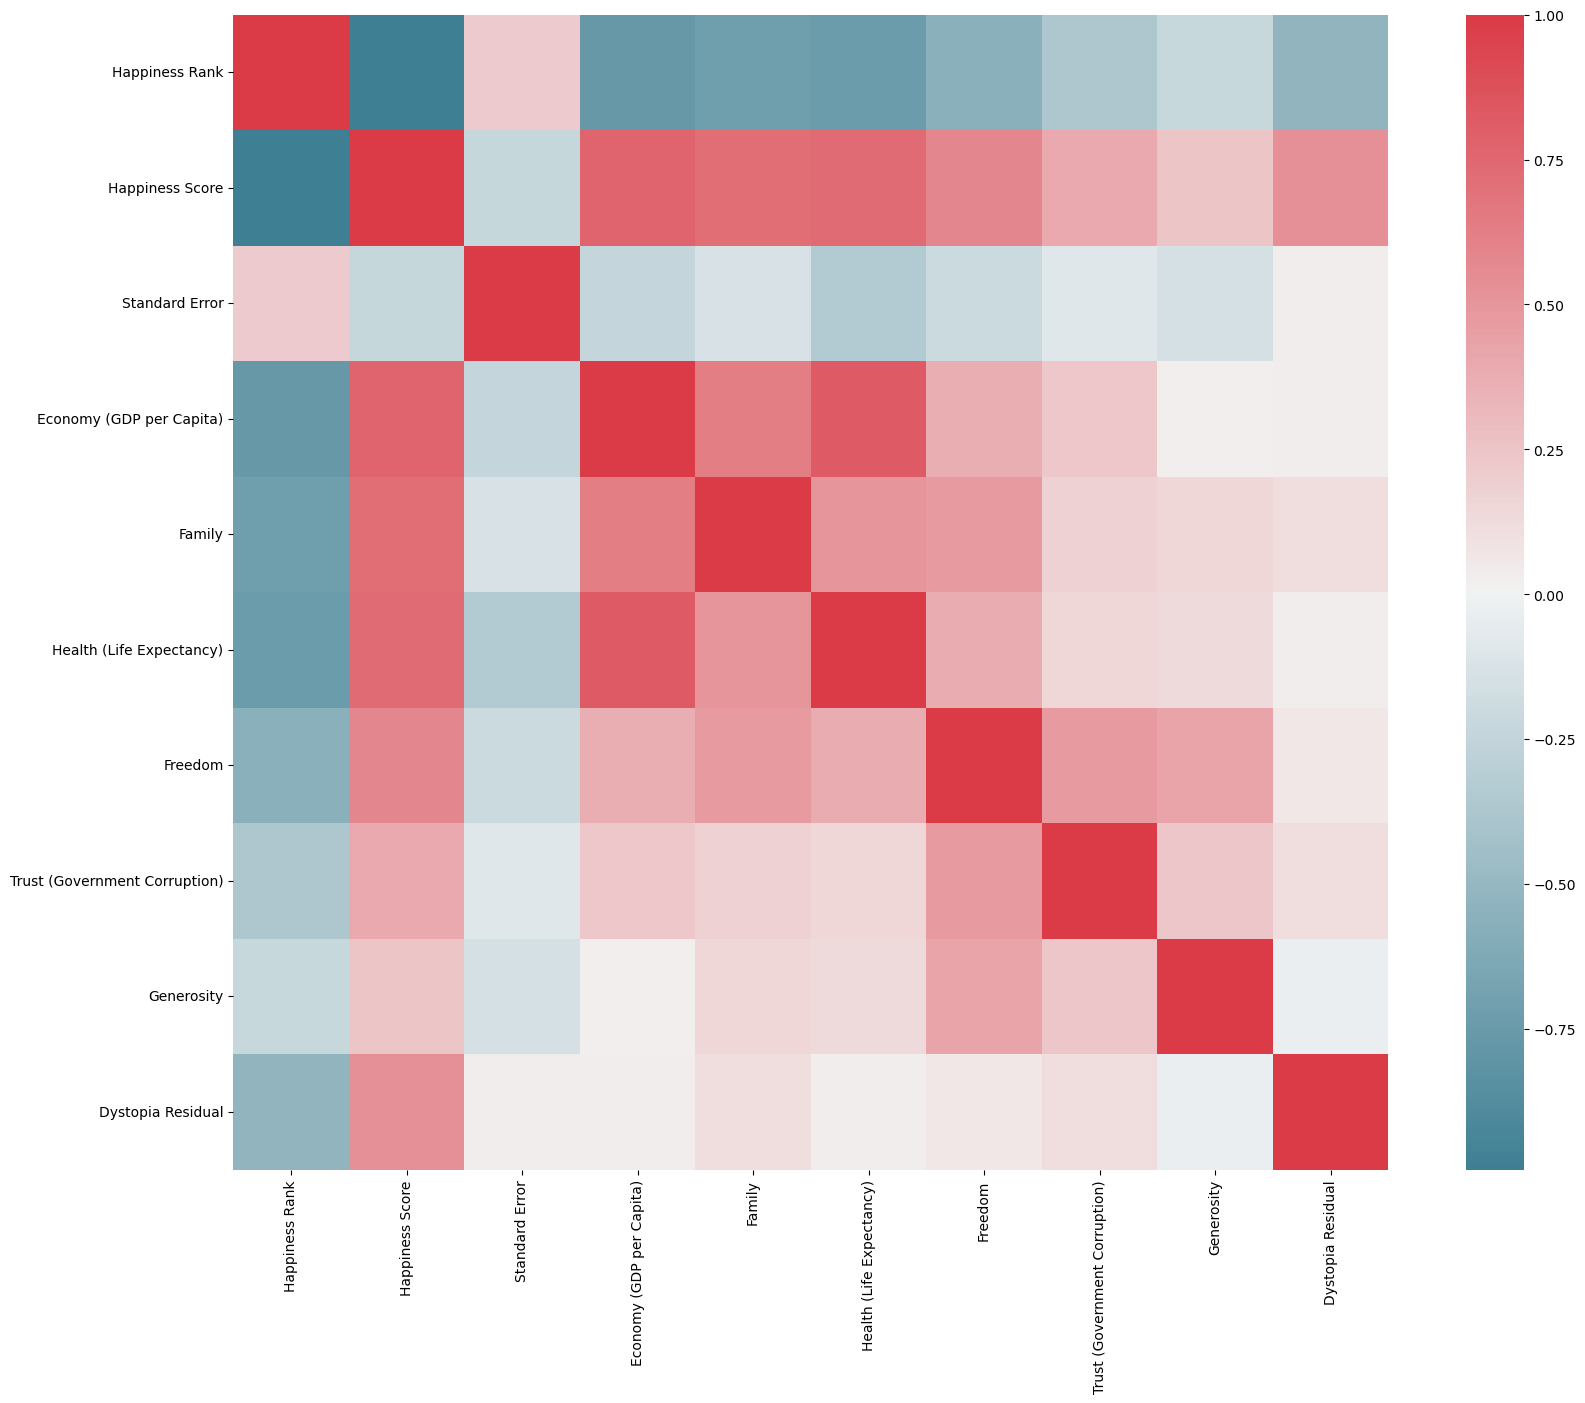

In [58]:
#Visualizing the correlation matrix byplotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

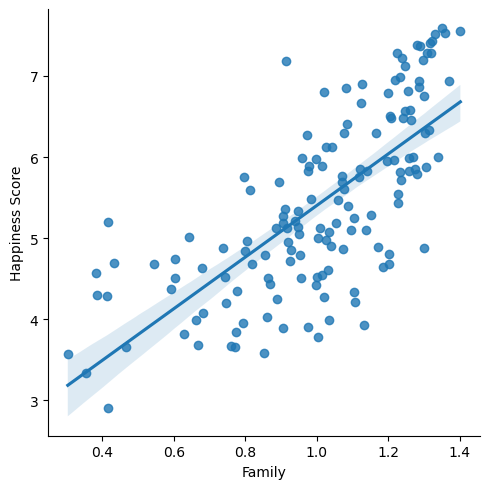

In [59]:
#Visualize using lmplot(positive corelation between Happiness score and Family )
sns.lmplot(x='Family',y='Happiness Score',data=df,palette='colorblind')

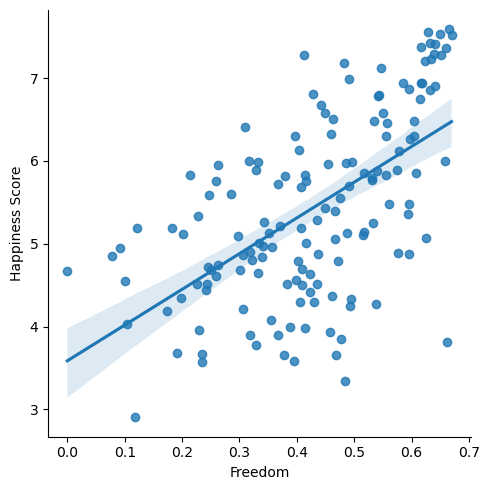

In [60]:
#Visualize using lmplot(positive corelation between Happiness score and Freedom )
sns.lmplot(x='Freedom',y='Happiness Score',data=df,palette='colorblind')

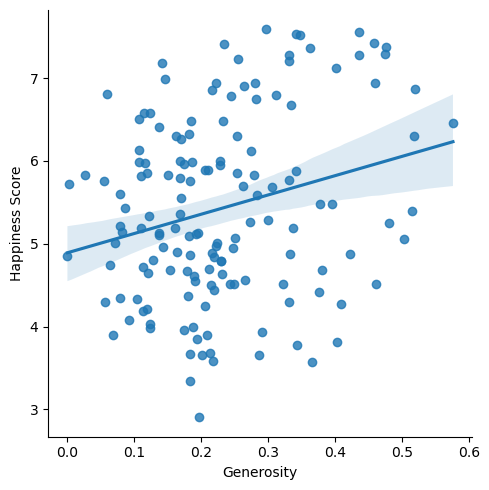

In [61]:
#Visualize using lmplot(weak positive corelation between Happiness score and Generosity )
sns.lmplot(x='Generosity',y='Happiness Score',data=df,palette='colorblind')

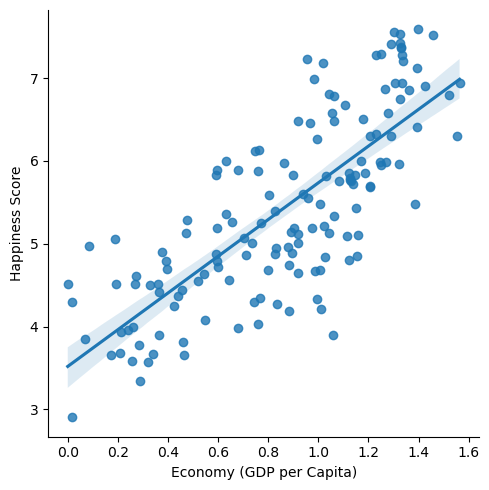

In [62]:
#Visualize using lmplot(strong positive corelation between Happiness score and Economy (GDP per Capita) )
sns.lmplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df,palette='colorblind')

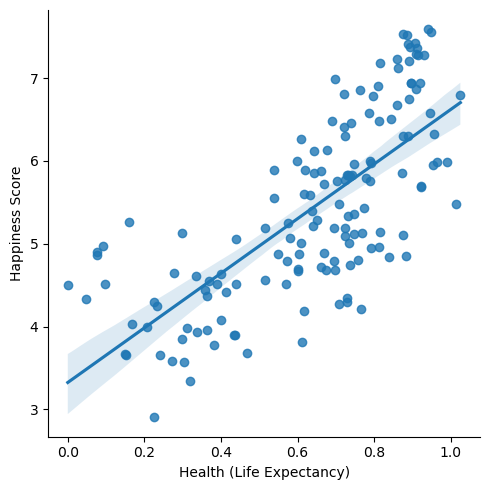

In [63]:
#Visualize using lmplot(strong positive corelation between Happiness score and Health (Life Expectancy) )
sns.lmplot(x='Health (Life Expectancy)',y='Happiness Score',data=df,palette='colorblind')

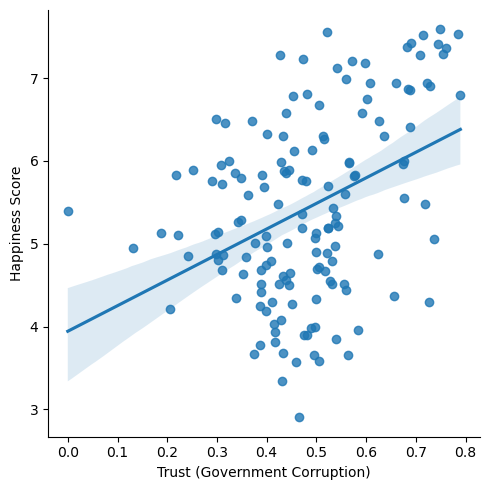

In [64]:
#Visualize using lmplot(strong positive corelation between Happiness score and Health (Government corruption) )
sns.lmplot(x='Trust (Government Corruption)',y='Happiness Score',data=df,palette='colorblind')

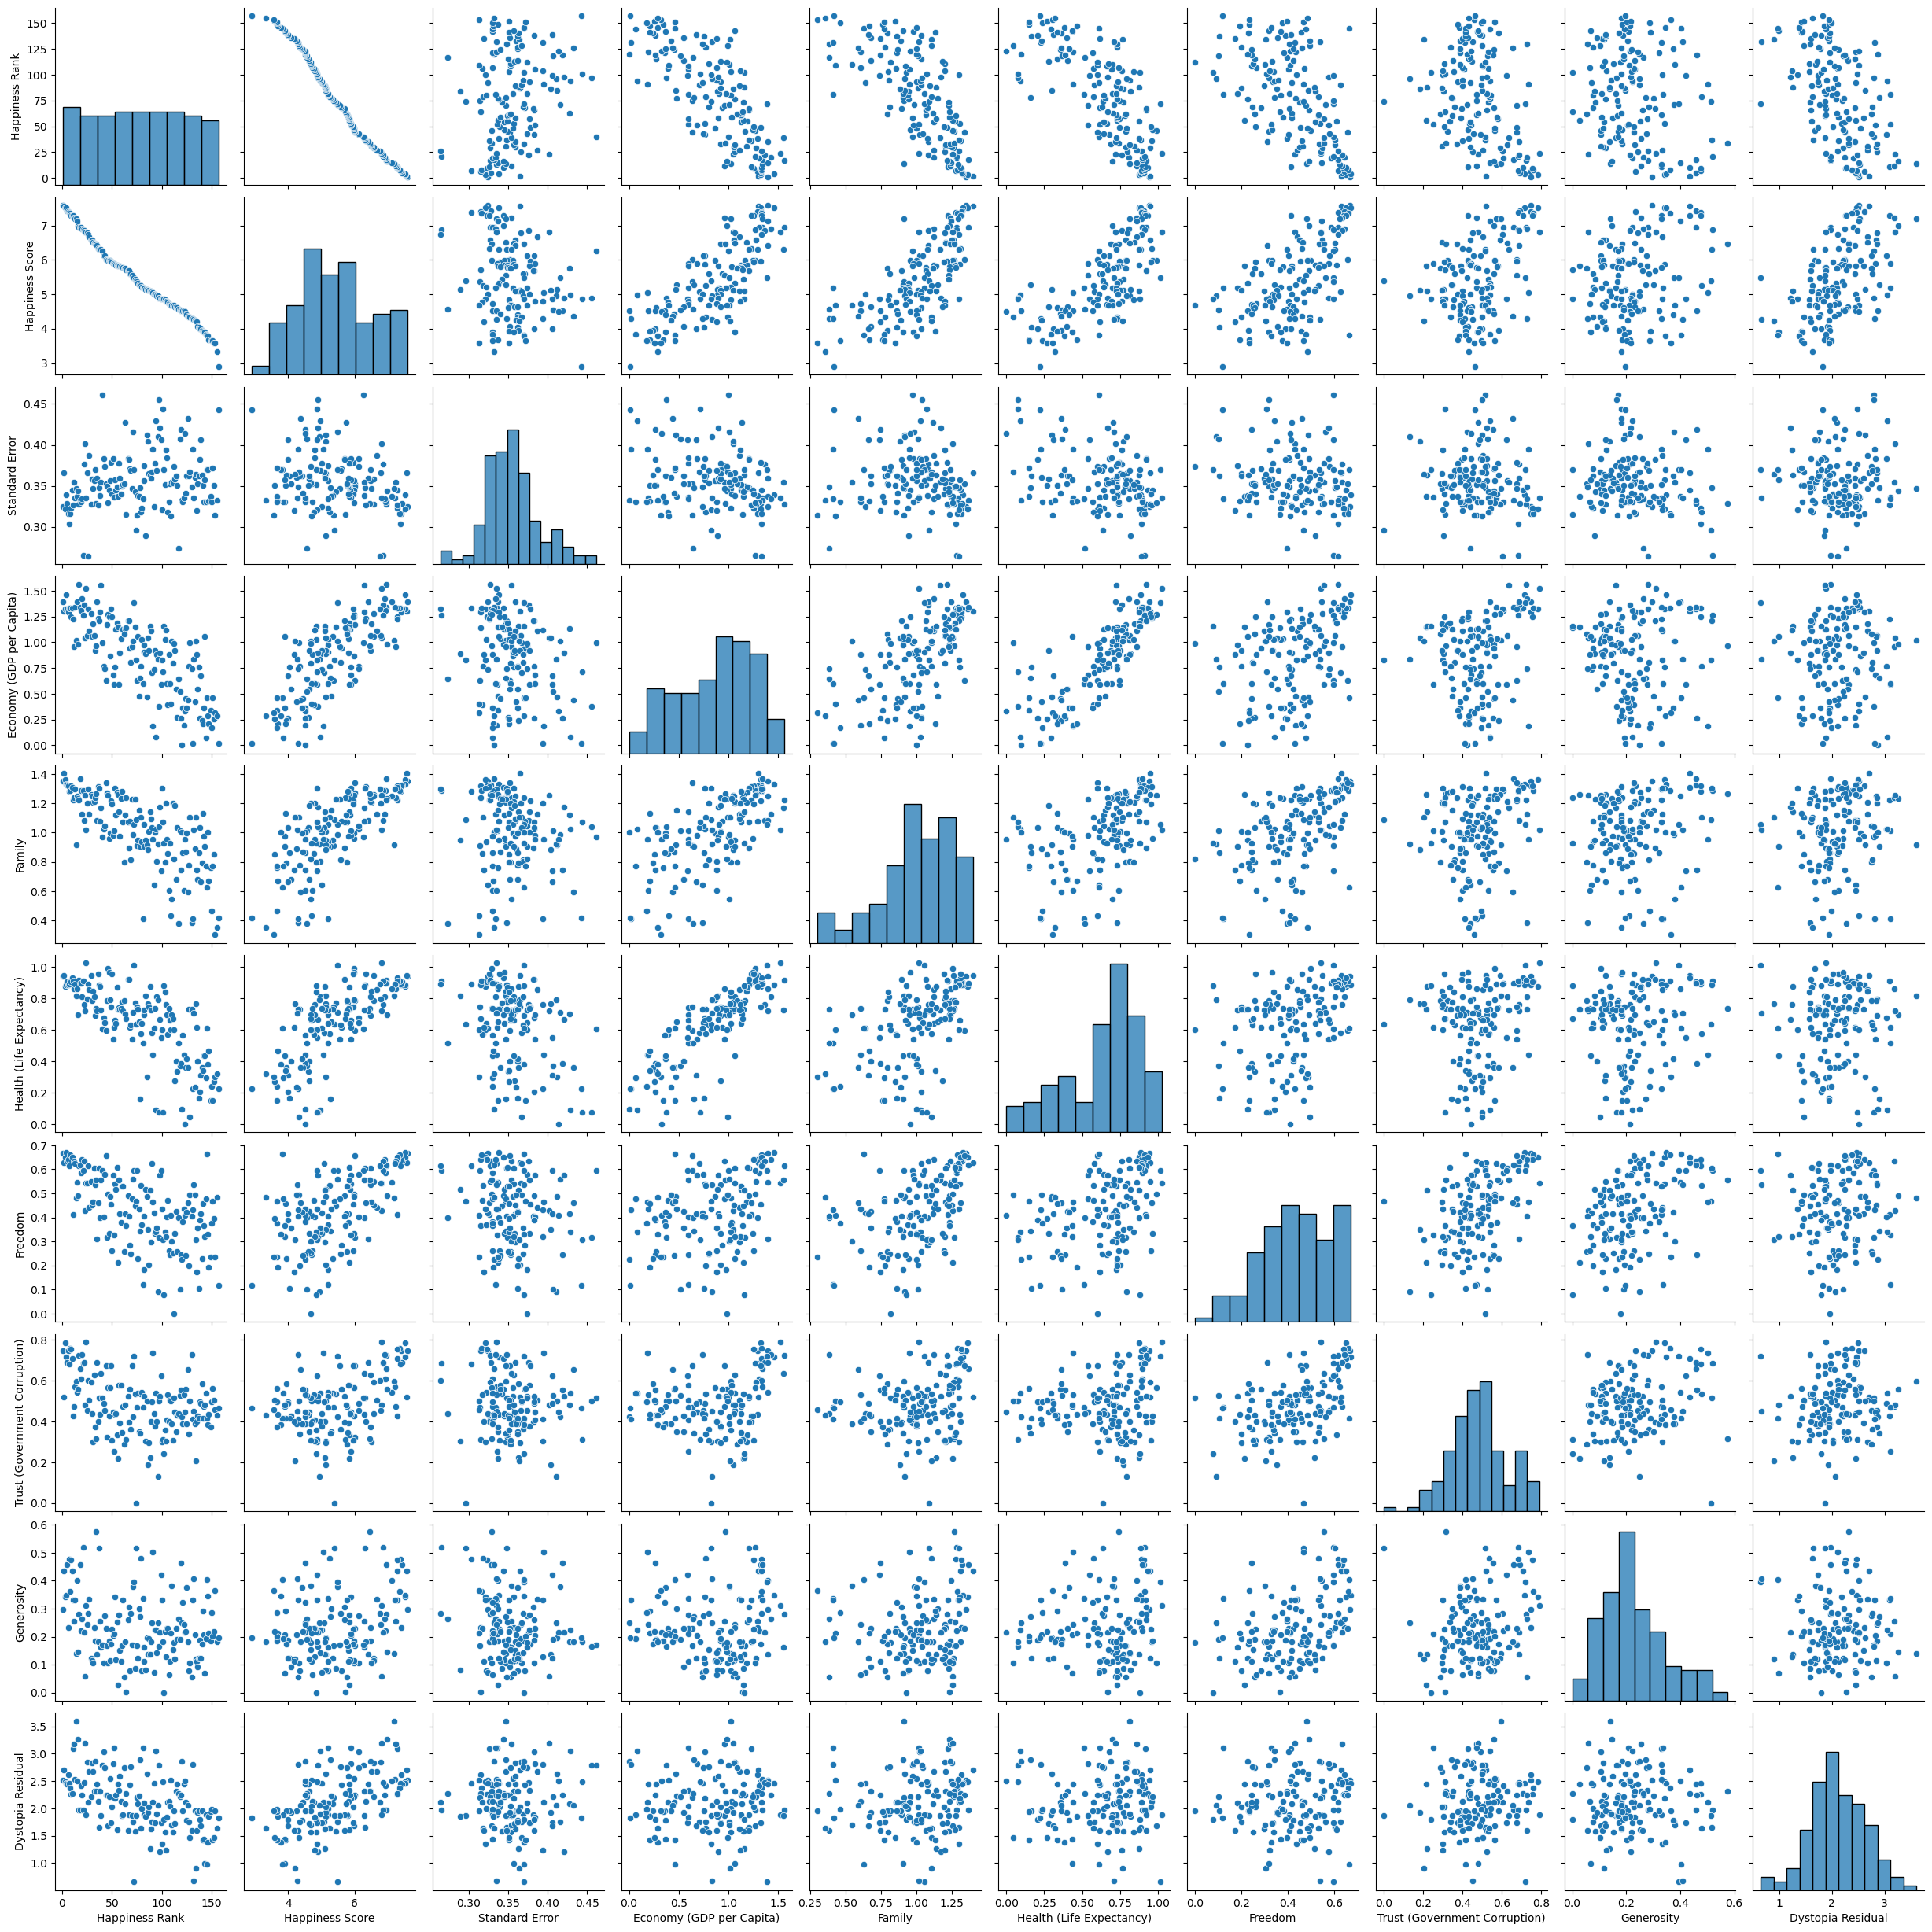

In [65]:
sns.pairplot(data=df,palette = "Dark2")

In [ ]:
#From the above visualizations pertaining Correlation,we see that there is Multicollinearity which need to be removed but before we do that we must seperate features and labels



In [67]:
#Seperate the target and independent variables into x and y
x=df.drop("Happiness Score",axis=1)
y=df["Happiness Score"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (149, 9)
Label Dimension= (149,)


In [68]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-1.713905,-0.911097,1.381916,1.357879,1.235390,1.583704,1.886835,0.546305,0.756876
1,-1.691535,0.289534,1.138324,1.567882,1.261541,1.338953,0.279412,1.713898,1.109300
2,-1.669166,-0.988343,1.198220,1.401974,0.962900,1.476027,2.142033,0.919630,0.708507
3,-1.646796,-0.496623,1.543526,1.283947,1.006023,1.611371,1.646273,0.966495,0.657485
4,-1.624427,-0.781797,1.200315,1.250726,1.089333,1.366887,1.477326,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...
144,1.641542,0.473095,-1.026255,-0.945943,-1.985941,0.274090,0.581308,-0.249803,-1.343100
145,1.663911,-0.134003,-1.562163,-0.624365,-1.498813,-0.216276,0.161899,-0.117411,-1.252030
146,1.686281,-1.223140,-1.402596,-2.811354,-1.367851,-1.285662,-0.153050,1.118051,-0.322135
147,1.731020,-0.690149,-1.488379,-2.608163,-1.303594,0.379439,-0.355660,-0.409226,-0.930702


In [69]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,79.964051,Happiness Rank
1,1.186494,Standard Error
2,13.222273,Economy (GDP per Capita)
3,6.255219,Family
4,8.803673,Health (Life Expectancy)
5,3.473270,Freedom
6,1.731961,Trust (Government Corruption)
7,2.004376,Generosity
8,18.661752,Dystopia Residual


In [ ]:
#I will not drop the column with the highest VIF value so as not to loose too much data.The data will be dealt with by regularisation methods like Lasso and Ridge Regression

In [84]:
#Modelling
#import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [71]:
#Creating train test split
#Finding the best random state

maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at random_state",maxRS)

Maximum r2 score is  0.9995270242212498 at random_state 194


In [72]:
#Import Regression algorithms

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [73]:
#checking accuracy of Linear Regression

LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.9981866029859179
R2_score on training data: 99.91685182982675
Mean Absolute Error:- 0.030250139814646203
Mean Squared Error:- 0.0018231657112610985
Root Mean Squared Error:- 0.04269854460354707


In [74]:
#checking accuracy of RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.9894681718016758
R2_score on training data: 99.96448615288762
Mean Absolute Error:- 0.038008666666666496
Mean Squared Error:- 0.010588562735555413
Root Mean Squared Error:- 0.10290074215259777


In [75]:
#checking accuracy of KNN Model

knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.8771552760585282
R2_score on training data: 96.31854216381296
Mean Absolute Error:- 0.25668444444444444
Mean Squared Error:- 0.12350648355555562
Root Mean Squared Error:- 0.3514348923421743


In [76]:
#checking accuracy of the Gradient Boosting Regressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.9943120809999525
R2_score on training data: 99.99991518134276
Mean Absolute Error:- 0.03276007604836137
Mean Squared Error:- 0.0057185595921839805
Root Mean Squared Error:- 0.07562115836314583


In [77]:
#checking accuracy of the Lasso Regressor

lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.23467099004677394
R2_score on training data: 27.13777767319011
Mean Absolute Error:- 0.7409619454975342
Mean Squared Error:- 0.7694518067166838
Root Mean Squared Error:- 0.8771840210108046


In [78]:
#checking accuracy of the Ridge Regressor

rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.9979576476805408
R2_score on training data: 99.88731010184057
Mean Absolute Error:- 0.0338917245329684
Mean Squared Error:- 0.0020533543897100176
Root Mean Squared Error:- 0.04531395358727836


In [79]:
#checking accuracy of the Decision Tree Regressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.9803430467762936
R2_score on training data: 100.0
Mean Absolute Error:- 0.07982222222222218
Mean Squared Error:- 0.019762844444444448
Root Mean Squared Error:- 0.1405803842804694


In [81]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [87]:
#Checking CV score for Linear Regressor
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_LR)-score.mean())

[0.93445445 0.97337815 0.94199143 0.95586342 0.9917318 ]
0.9594838522673248
Difference between R2 score and cross validation score is - 0.03870275071859308


In [85]:
#Checking CV score for Random Forest Regressor
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_RFR)-score.mean())

[-4.3314658  -0.6694073  -0.20510922 -0.90773848 -2.7655042 ]
-1.77584499809319
Difference between R2 score and cross validation score is - 2.765313169894866


In [88]:
#Checking CV score for KNN model
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_knn)-score.mean())

[-8.42546914 -1.29699261 -0.98001998 -4.16504087 -4.70309502]
-3.9141235258570743
Difference between R2 score and cross validation score is - 4.7912788019156025


In [89]:
#Checking CV score for Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_GBR)-score.mean())

[-3.49185391  0.37456093 -0.0260902  -0.30525729 -2.27744284]
-1.1452166616240063
Difference between R2 score and cross validation score is - 2.1395287426239586


In [90]:
#Checking CV score for Lasso Regressor model
score=cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_lasso)-score.mean())

[-42.37117014  -6.16135166   0.08421235 -20.96933149 -29.0315447 ]
-19.689837128820017
Difference between R2 score and cross validation score is - 19.92450811886679


In [91]:
#Checking CV score for Ridge Regressor model
score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_rd)-score.mean())

[0.84475084 0.949678   0.95179972 0.93640409 0.98451002]
0.9334285341263782
Difference between R2 score and cross validation score is - 0.06452911355416269


In [92]:
#Checking CV score for Decision tree regressor model
score=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_dtr)-score.mean())

[-4.04688433 -0.54781599 -0.18365467 -0.79176307 -2.08271262]
-1.5305661346738373
Difference between R2 score and cross validation score is - 2.5109091814501308


In [ ]:
#Model Selected is Linear Regressor with the least difference between r2 score and cross validation

In [ ]:
#There are no hyperparameters for tuning on Linear Regression